# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [47]:
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper

In [48]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [49]:
# Define a transform but don't use normalization
#transform = transforms.Compose([transforms.ToTensor(),
#                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [50]:
image, label = next(iter(trainloader))
image.mean(dim = 0).shape

torch.Size([1, 28, 28])

In [51]:
# Average image in a batch:
print(image.mean(dim = 0))
print(image.mean(dim = 0).mean())

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0011, 0.0011, 0.0089,
          0.0203, 0.0499, 0.1295, 0.2156, 0.2336, 0.2169, 0.1732, 0.2081,
          0.2403, 0.1719, 0.0967, 0.0241, 0.0199, 0.0066, 0.0039, 0.0042,
          0.0022, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0013, 0.0012, 0.0220, 0.0710,
          0.1602, 0.2359, 0.3194, 0.4336, 0.4651, 0.4835, 0.4504, 0.4647,
          0.4542, 0.3752, 0.3491, 0.2115, 0.1194, 0.0698, 0.0382, 0.0176,
          0.0165, 0.0088, 0.0002, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0002, 0.0046, 0.0328, 0.0828, 0.1277,
          0.2211, 0.2749, 0.3769, 0.4407, 0.4730, 0.4801, 0.4699, 0.4833,
          0.4374, 0.4369, 0.4071, 0.2873, 0.2062, 0.1502, 0.1039, 0.0513,
          0.0227, 0.0045, 0.0005, 0.0000],
         [0.0000, 0.0001, 0.0005, 0.0003, 0.0213, 0.0675, 0.1188, 0.1838,
          0.2692, 0.3214, 0.3981, 0.4406, 0.4448, 0.4635, 0.4735, 0.4751,
          0.4551, 0.4458, 0.4348, 0.3564, 0.2669, 0.1934,

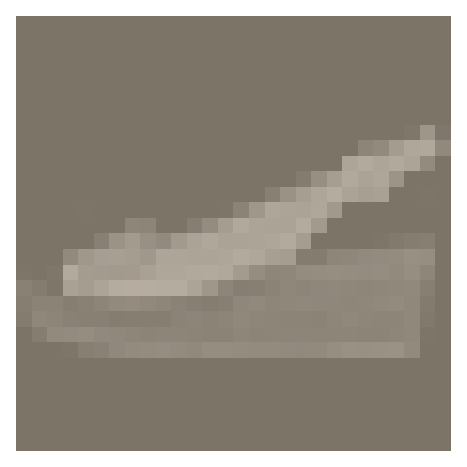

In [52]:
helper.imshow(image[7,:]);

## Building and train the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.


Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [53]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [54]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        # Define ReLU activation and log-softmax output 
        self.ReLU = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.ReLU(x)
        x = self.fc3(x)
        x = self.logsoftmax(x)
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (ReLU): ReLU()
  (logsoftmax): LogSoftmax()
)

In [55]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        # Forward pass, get our log-probabilities
        log_prob = model.forward(images)
        loss = criterion(log_prob, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Training loss for epoch # " + str(e) + ": " + str(running_loss/len(trainloader)))

Training loss for epoch # 0: 0.5694557493334131
Training loss for epoch # 1: 0.39723556217894374
Training loss for epoch # 2: 0.3556579046014911
Training loss for epoch # 3: 0.32601035233817377
Training loss for epoch # 4: 0.30795767576074295
Training loss for epoch # 5: 0.2953592455749319
Training loss for epoch # 6: 0.2802769504090362
Training loss for epoch # 7: 0.2704023537494099
Training loss for epoch # 8: 0.2577587871877814
Training loss for epoch # 9: 0.2516948783845663


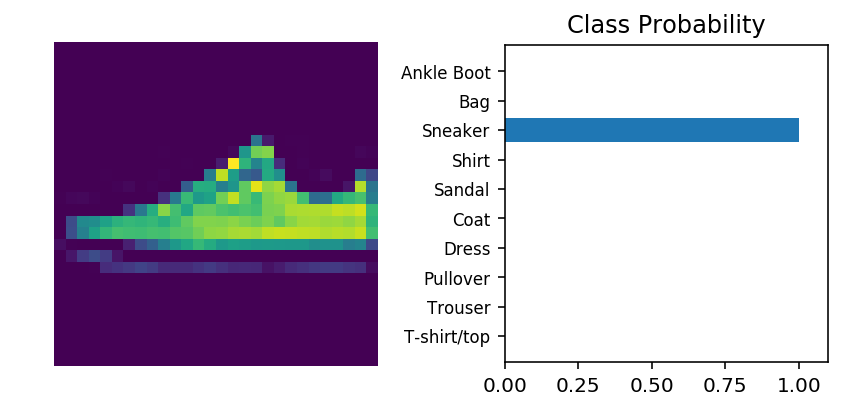

In [56]:
# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()

# look at a random image
image_index = 3
img = images[image_index]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# In the test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    log_probabilities = model.forward(img)
    # Output of the network are logits, need to take softmax for probabilities
    probabilities = torch.exp(log_probabilities)


helper.view_classify(img.resize_(1, 28, 28), probabilities, version='Fashion')

In [58]:
# Calculating test accuracy:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 88.05 %


In [61]:
total

10000